In [1]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
import DL_project_utils as utils
from matplotlib import pyplot as plt
from models import CNN_1
import pandas as pd

%load_ext autoreload
%autoreload 1

In [3]:
# %run test.py

In [6]:
train_data, test_data = utils.read_input()

In [7]:
iters_ = 10

### Test 1: select optimizer, learning rate and batch size

In [9]:
learning_rate_l = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3]
batch_size_l = [10, 20, 40, 60, 100]
optimizer_l= ['SGD', 'Adam']

params_list = []
for iter_ in range(2):
    for lr in learning_rate_l:
        for bs in batch_size_l:
            for opt in optimizer_l:                
                model = CNN_1()
                train_loss, train_acc, val_loss, val_acc = utils.train_model(model,
                                                                  train_dataset=train_data,
                                                                  learning_rate=lr,
                                                                  epochs=60,
                                                                  batch_size=bs,
                                                                  eval_=True,
                                                                  optimizer=opt,
                                                                  loss='cross_entropy',
                                                                  validation_split=0.1,
                                                                  verbose=False,
                                                                  cuda=False,
                                                                  momentum=0.0,
                                                                  weight_decay=0.0)
                  
                params_list.append(dict(lr=lr, bs=bs, opt=opt, val_acc=100*val_acc[-1]))
                print('\n lr={}, bs={}, opt={},val_acc={}%'.format(lr,bs,opt,100*val_acc[-1]))

df_params_1_ = pd.DataFrame(params_list) 


 lr=0.1, bs=10, opt=SGD,val_acc=85.00000238418579%

 lr=0.1, bs=10, opt=Adam,val_acc=47.999998927116394%

 lr=0.1, bs=20, opt=SGD,val_acc=81.00000023841858%

 lr=0.1, bs=20, opt=Adam,val_acc=55.000001192092896%

 lr=0.1, bs=40, opt=SGD,val_acc=79.00000214576721%

 lr=0.1, bs=40, opt=Adam,val_acc=52.99999713897705%

 lr=0.1, bs=60, opt=SGD,val_acc=81.00000023841858%

 lr=0.1, bs=60, opt=Adam,val_acc=57.999998331069946%

 lr=0.1, bs=100, opt=SGD,val_acc=81.00000023841858%

 lr=0.1, bs=100, opt=Adam,val_acc=56.99999928474426%

 lr=0.05, bs=10, opt=SGD,val_acc=75.0%

 lr=0.05, bs=10, opt=Adam,val_acc=56.99999928474426%

 lr=0.05, bs=20, opt=SGD,val_acc=79.00000214576721%

 lr=0.05, bs=20, opt=Adam,val_acc=57.999998331069946%

 lr=0.05, bs=40, opt=SGD,val_acc=81.00000023841858%

 lr=0.05, bs=40, opt=Adam,val_acc=46.00000083446503%

 lr=0.05, bs=60, opt=SGD,val_acc=83.99999737739563%

 lr=0.05, bs=60, opt=Adam,val_acc=62.00000047683716%

 lr=0.05, bs=100, opt=SGD,val_acc=79.00000214576721%


Parameters with maximum Validation Accuracy:
 lr         0.001
bs            60
opt         Adam
val_acc     85.5
Name: 6, dtype: object


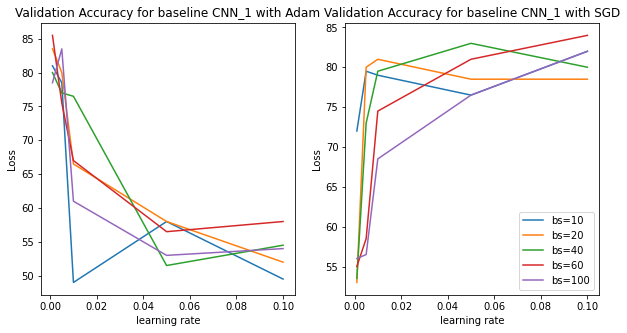

In [10]:
df_params_1 = df_params_1_.groupby(["lr","bs","opt"]).mean().reset_index()
print("Parameters with maximum Validation Accuracy:\n",df_params_1.loc[df_params_1['val_acc'].idxmax()])

f, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

for bs in batch_size_l:
    cols1 = (df_params_1["opt"] == "Adam") & (df_params_1["bs"] == bs)
    ax1.plot(df_params_1[cols1]["lr"], df_params_1[cols1]["val_acc"], label=f'bs={bs}')
    
ax1.set_xlabel('learning rate')
ax1.set_ylabel('Loss')
ax1.set_title("Validation Accuracy for baseline CNN_1 with Adam")

for bs in batch_size_l:
    cols2 = (df_params_1["opt"] == "SGD") & (df_params_1["bs"] == bs)
    ax2.plot(df_params_1[cols2]["lr"], df_params_1[cols2]["val_acc"], label=f'bs={bs}')
    
ax2.set_xlabel('learning rate')
ax2.set_ylabel('Loss')
ax2.set_title("Validation Accuracy for baseline CNN_1 with SGD")


plt.legend(loc='lower right')
plt.show()

### Test 2: select size of convolution kernels

In [12]:
lr, bs, opt= 0.001, 60, "Adam"

kernel_1_l = [3,4,5]
kernel_2_l = [3,4,5]

params_list = []
for iter_ in range(3):
    for k1 in kernel_1_l:
        for k2 in kernel_2_l:
            model = CNN_1(kernel_1=k1, kernel_2=k2)
            train_loss, train_acc, val_loss, val_acc = utils.train_model(model,
                                                          train_dataset=train_data,
                                                          learning_rate=lr,
                                                          epochs=60,
                                                          batch_size=bs,
                                                          eval_=True,
                                                          optimizer=opt,
                                                          loss='cross_entropy',
                                                          validation_split=0.1,
                                                          verbose=False,
                                                          cuda=False,
                                                          momentum=0.0,
                                                          weight_decay=0.0)

            params_list.append(dict(k1_size=k1, k2_size=k2, val_acc=100*val_acc[-1]))
            print('\n k1_size={}, k2_size={},val_acc={}%'.format(k1,k2,100*val_acc[-1]))
                
df_params_2_ = pd.DataFrame(params_list) 


 k1_size=3, k2_size=3,val_acc=87.00000047683716%

 k1_size=3, k2_size=4,val_acc=83.99999737739563%

 k1_size=3, k2_size=5,val_acc=75.0%

 k1_size=4, k2_size=3,val_acc=87.00000047683716%

 k1_size=4, k2_size=4,val_acc=73.00000190734863%

 k1_size=4, k2_size=5,val_acc=85.00000238418579%

 k1_size=5, k2_size=3,val_acc=80.0000011920929%

 k1_size=5, k2_size=4,val_acc=83.99999737739563%

 k1_size=5, k2_size=5,val_acc=80.0000011920929%

 k1_size=3, k2_size=3,val_acc=79.00000214576721%

 k1_size=3, k2_size=4,val_acc=87.99999952316284%

 k1_size=3, k2_size=5,val_acc=79.00000214576721%

 k1_size=4, k2_size=3,val_acc=86.00000143051147%

 k1_size=4, k2_size=4,val_acc=83.99999737739563%

 k1_size=4, k2_size=5,val_acc=85.00000238418579%

 k1_size=5, k2_size=3,val_acc=81.00000023841858%

 k1_size=5, k2_size=4,val_acc=79.00000214576721%

 k1_size=5, k2_size=5,val_acc=75.99999904632568%

 k1_size=3, k2_size=3,val_acc=86.00000143051147%

 k1_size=3, k2_size=4,val_acc=83.99999737739563%

 k1_size=3, k2

Parameters with maximum Validation Accuracy:
 k1_size     3.000000
k2_size     4.000000
val_acc    85.333331
Name: 1, dtype: float64


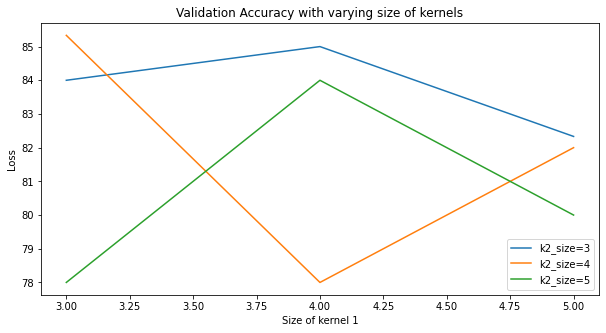

In [13]:
df_params_2 = df_params_2_.groupby(["k1_size","k2_size"]).mean().reset_index()

print("Parameters with maximum Validation Accuracy:\n",df_params_2.loc[df_params_2['val_acc'].idxmax()])

fig = plt.figure(figsize=(10, 5))

for k2 in kernel_2_l:
    cols = (df_params_2["k2_size"] == k2)
    plt.plot(df_params_2[cols]["k1_size"], df_params_2[cols]["val_acc"], label=f'k2_size={k2}')
    
plt.xlabel('Size of kernel 1')
plt.ylabel('Loss')
plt.title("Validation Accuracy with varying size of kernels")


plt.legend(loc='lower right')
plt.show()

### Test 3: select size of convolution channels

In [14]:
lr, bs, opt= 0.001, 60, "Adam"
k1, k2 = 3, 3

channels_1_l = [16,24,32,48,64]
channels_2_l = [16,24,32,48,64]

params_list = []
for iter_ in range(2):
    for c1 in channels_1_l:
        for c2 in channels_2_l:
            if c2>=c1:
                model = CNN_1(nb_channels_1=c1, nb_channels_2=c2, kernel_1=k1, kernel_2=k2)
                train_loss, train_acc, val_loss, val_acc = utils.train_model(model,
                                                                 train_dataset=train_data,
                                                                 learning_rate=lr,
                                                                 epochs=60,
                                                                 batch_size=bs,
                                                                 eval_=True,
                                                                 optimizer=opt,
                                                                 loss='cross_entropy',
                                                                 validation_split=0.1,
                                                                 verbose=False,
                                                                 cuda=False,
                                                                 momentum=0.0,
                                                                 weight_decay=0.0)

                params_list.append(dict(c1_size=c1, c2_size=c2, val_acc=100*val_acc[-1]))
                print('\n c1_size={}, c2_size={},val_acc={}%'.format(c1,c2,100*val_acc[-1]))
                
df_params_3_ = pd.DataFrame(params_list) 


 c1_size=16, c2_size=16,val_acc=75.0%

 c1_size=16, c2_size=24,val_acc=81.00000023841858%

 c1_size=16, c2_size=32,val_acc=77.99999713897705%

 c1_size=16, c2_size=48,val_acc=75.99999904632568%

 c1_size=16, c2_size=64,val_acc=79.00000214576721%

 c1_size=24, c2_size=24,val_acc=77.99999713897705%

 c1_size=24, c2_size=32,val_acc=81.99999928474426%

 c1_size=24, c2_size=48,val_acc=79.00000214576721%

 c1_size=24, c2_size=64,val_acc=82.99999833106995%

 c1_size=32, c2_size=32,val_acc=88.99999856948853%

 c1_size=32, c2_size=48,val_acc=80.0000011920929%

 c1_size=32, c2_size=64,val_acc=85.00000238418579%

 c1_size=48, c2_size=48,val_acc=79.00000214576721%

 c1_size=48, c2_size=64,val_acc=75.99999904632568%

 c1_size=64, c2_size=64,val_acc=49.000000953674316%

 c1_size=16, c2_size=16,val_acc=77.99999713897705%

 c1_size=16, c2_size=24,val_acc=79.00000214576721%

 c1_size=16, c2_size=32,val_acc=74.00000095367432%

 c1_size=16, c2_size=48,val_acc=81.99999928474426%

 c1_size=16, c2_size=64,

Parameters with maximum Validation Accuracy:
 c1_size    32.000000
c2_size    32.000000
val_acc    86.499998
Name: 9, dtype: float64


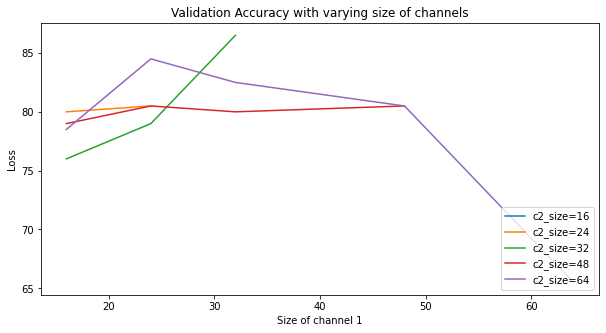

In [15]:
df_params_3 = df_params_3_.groupby(["c1_size","c2_size"]).mean().reset_index()

print("Parameters with maximum Validation Accuracy:\n",df_params_3.loc[df_params_3['val_acc'].idxmax()])

fig = plt.figure(figsize=(10, 5))

for c2 in channels_2_l:
    cols = (df_params_3["c2_size"] == c2)
    plt.plot(df_params_3[cols]["c1_size"], df_params_3[cols]["val_acc"], label=f'c2_size={c2}')
    
plt.xlabel('Size of channel 1')
plt.ylabel('Loss')
plt.title("Validation Accuracy with varying size of channels")


plt.legend(loc='lower right')
plt.show()

### Test 4: select size of fully connected layers

In [16]:
lr, bs, opt= 0.001, 60, "Adam"
k1, k2 = 3, 3
c1, c2 = 32, 32

nb_hidden_1_l = [32,64,128,192,256]
nb_hidden_2_l = [10,32,64]

params_list = []
for iter_ in range(2):
    for h1 in nb_hidden_1_l:
        for h2 in nb_hidden_2_l:
            if h2<h1:
                model = CNN_1(nb_channels_1=c1, nb_channels_2=c2, kernel_1=k1, kernel_2=k2, nb_hidden_1=h1, nb_hidden_2=h2)
                train_loss, train_acc, val_loss, val_acc = utils.train_model(model,
                                                                 train_dataset=train_data,
                                                                 learning_rate=lr,
                                                                 epochs=60,
                                                                 batch_size=bs,
                                                                 eval_=True,
                                                                 optimizer=opt,
                                                                 loss='cross_entropy',
                                                                 validation_split=0.1,
                                                                 verbose=False,
                                                                 cuda=False,
                                                                 momentum=0.0,
                                                                 weight_decay=0.0)

                params_list.append(dict(h1_size=h1, h2_size=h2, val_acc=100*val_acc[-1]))
                print('\n h1_size={}, h2_size={},val_acc={}%'.format(h1,h2,100*val_acc[-1]))
                
df_params_4_ = pd.DataFrame(params_list) 


 h1_size=32, h2_size=10,val_acc=81.00000023841858%

 h1_size=64, h2_size=10,val_acc=80.0000011920929%

 h1_size=64, h2_size=32,val_acc=75.99999904632568%

 h1_size=128, h2_size=10,val_acc=87.00000047683716%

 h1_size=128, h2_size=32,val_acc=81.99999928474426%

 h1_size=128, h2_size=64,val_acc=77.99999713897705%

 h1_size=192, h2_size=10,val_acc=83.99999737739563%

 h1_size=192, h2_size=32,val_acc=81.99999928474426%

 h1_size=192, h2_size=64,val_acc=81.00000023841858%

 h1_size=256, h2_size=10,val_acc=76.99999809265137%

 h1_size=256, h2_size=32,val_acc=79.00000214576721%

 h1_size=256, h2_size=64,val_acc=86.00000143051147%

 h1_size=32, h2_size=10,val_acc=81.00000023841858%

 h1_size=64, h2_size=10,val_acc=79.00000214576721%

 h1_size=64, h2_size=32,val_acc=81.00000023841858%

 h1_size=128, h2_size=10,val_acc=88.99999856948853%

 h1_size=128, h2_size=32,val_acc=79.00000214576721%

 h1_size=128, h2_size=64,val_acc=77.99999713897705%

 h1_size=192, h2_size=10,val_acc=80.0000011920929%



Parameters with maximum Validation Accuracy:
 h1_size    128.0
h2_size     10.0
val_acc     88.0
Name: 3, dtype: float64


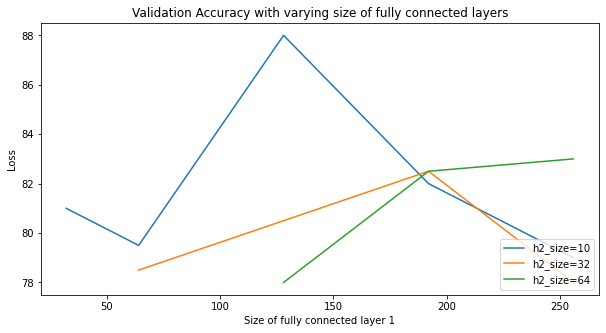

In [17]:
df_params_4 = df_params_4_.groupby(["h1_size","h2_size"]).mean().reset_index()

print("Parameters with maximum Validation Accuracy:\n",df_params_4.loc[df_params_4['val_acc'].idxmax()])

fig = plt.figure(figsize=(10, 5))

for h2 in nb_hidden_2_l:
    cols = (df_params_4["h2_size"] == h2)
    plt.plot(df_params_4[cols]["h1_size"], df_params_4[cols]["val_acc"], label=f'h2_size={h2}')
    
plt.xlabel('Size of fully connected layer 1')
plt.ylabel('Loss')
plt.title("Validation Accuracy with varying size of fully connected layers")


plt.legend(loc='lower right')
plt.show()

### Test 5: select dropout

In [20]:
lr, bs, opt= 0.001, 60, "Adam"
k1, k2 = 3, 3
c1, c2 = 32, 32
h1, h2 = 128, 10
dropout_p_l = [0.0,0.1,0.2,0.3,0.4,0.5]

params_list = []
for iter_ in range(3):
    for dropout in dropout_p_l:
        model = CNN_1(nb_channels_1=c1, nb_channels_2=c2, kernel_1=k1, kernel_2=k2, nb_hidden_1=h1, nb_hidden_2=h2, dropout_p=dropout)
        train_loss, train_acc, val_loss, val_acc = utils.train_model(model,
                                                          train_dataset=train_data,
                                                          learning_rate=lr,
                                                          epochs=60,
                                                          batch_size=bs,
                                                          eval_=True,
                                                          optimizer=opt,
                                                          loss='cross_entropy',
                                                          validation_split=0.1,
                                                          verbose=False,
                                                          cuda=False,
                                                          momentum=0.0,
                                                          weight_decay=0.0)

        params_list.append(dict(dropout=dropout, val_acc=100*val_acc[-1]))
        print('\n dropout={},val_acc={}%'.format(dropout,100*val_acc[-1]))
                
df_params_5_ = pd.DataFrame(params_list) 


 dropout=0.0,val_acc=79.00000214576721%

 dropout=0.1,val_acc=75.99999904632568%

 dropout=0.2,val_acc=81.99999928474426%

 dropout=0.3,val_acc=75.99999904632568%

 dropout=0.4,val_acc=82.99999833106995%

 dropout=0.5,val_acc=85.00000238418579%

 dropout=0.0,val_acc=81.99999928474426%

 dropout=0.1,val_acc=86.00000143051147%

 dropout=0.2,val_acc=82.99999833106995%

 dropout=0.3,val_acc=85.00000238418579%

 dropout=0.4,val_acc=82.99999833106995%

 dropout=0.5,val_acc=81.00000023841858%

 dropout=0.0,val_acc=75.0%

 dropout=0.1,val_acc=82.99999833106995%

 dropout=0.2,val_acc=83.99999737739563%

 dropout=0.3,val_acc=81.00000023841858%

 dropout=0.4,val_acc=76.99999809265137%

 dropout=0.5,val_acc=83.99999737739563%


Parameters with maximum Validation Accuracy:
 dropout     0.500000
val_acc    83.333333
Name: 5, dtype: float64


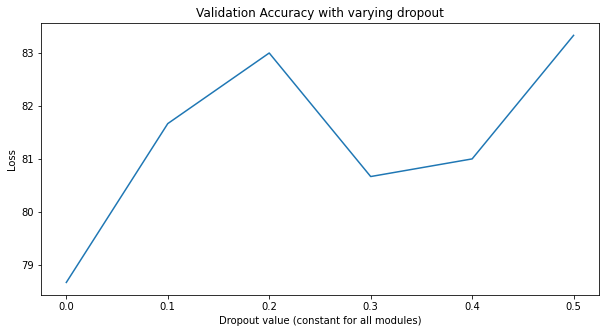

In [21]:
df_params_5 = df_params_5_.groupby("dropout").mean().reset_index()

print("Parameters with maximum Validation Accuracy:\n",df_params_5.loc[df_params_5['val_acc'].idxmax()])

fig = plt.figure(figsize=(10, 5))
plt.plot(df_params_5["dropout"], df_params_5["val_acc"])
plt.xlabel('Dropout value (constant for all modules)')
plt.ylabel('Loss')
plt.title("Validation Accuracy with varying dropout")
plt.show()

### Predict mean test accuracy with 10 **rounds**
Add batch normalization and replace each convolution module with two convulotions of same size

In [3]:
lr, bs, opt= 0.001, 60, "Adam"
k1, k2 = 3, 3
c1, c2 = 32, 32
h1, h2 = 128, 10
dropout= 0.2

statistics = []
for iter_ in range(iters_):
    train_data_, test_data_ = utils.read_input()
    model_ = CNN_1(batchNorm = True, double_conv=True, nb_channels_1=c1, nb_channels_2=c2, kernel_1=k1, kernel_2=k2, nb_hidden_1=h1, nb_hidden_2=h2, dropout_p=dropout)
    _, _, _, _ = utils.train_model(model_,
                                    train_dataset=train_data_,
                                    learning_rate=lr,
                                    epochs=60,
                                    batch_size=bs,
                                    eval_=False,
                                    optimizer=opt,
                                    loss='cross_entropy',
                                    validation_split=0.0,
                                    verbose=False,
                                    cuda=False,
                                    momentum=0.0,
                                    weight_decay=0.0)
    
    test_acc = 100*utils.evaluate_model(model_, test_data_, batch_size=bs)
    print(f'Test accuracy round {iter_+1}/{iters_} = {test_acc}%')
    statistics.append(test_acc)

In [4]:
pytorch_total_params = sum(p.numel() for p in model_.parameters())
pytorch_total_params

In [1]:
avg = sum(statistics) / len(statistics)
var = sum((x-avg)**2 for x in statistics) / len(statistics)
std = var**0.5
print(f'Validation accuracy over {iters_} rounds: mean={avg}% std={std}%')

In [2]:
fig = plt.figure(figsize=(6, 6))
plt.boxplot([statistics])
plt.ylabel('Accuracy')
plt.title(f'Validation accuracy over {iters_} rounds')
plt.legend(['CNN_1'],loc='upper right')
plt.show()